In [263]:
import numpy as np
import pandas as pd
import xlrd
import xml.etree.ElementTree as et
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

# DATOS

#### Cargamos los datos

In [264]:
df = pd.read_excel("T1.xlsx", sheet_name="h2")

In [265]:
df1 = pd.read_excel("T1.xlsx", sheet_name="h1")

In [266]:
df2 = pd.read_csv("T2.csv", encoding="utf-8")

In [267]:
df3 = pd.read_xml("T3.xml", encoding="utf-8")

In [268]:
df4 = pd.read_csv("T4.csv", sep=";")

In [269]:
df5 = pd.read_csv("T5.txt", sep="\t", encoding="utf-8")

In [270]:
df6 = pd.read_csv("T6", sep=",", encoding="utf-8")

#### Colocamos el 'PassengerId' como indice

In [271]:
df.set_index("PassengerId", inplace=True)

In [272]:
df1.set_index("PassengerId", inplace=True)

In [273]:
df2.set_index("PassengerId", inplace=True)

In [274]:
df3.set_index("PassengerId", inplace=True)

In [275]:
df4.set_index("PassengerId", inplace=True)

In [276]:
df5.set_index("PassengerId", inplace=True)

In [277]:
df6.set_index("PassengerId", inplace=True)

#### Unimos los dataset

In [278]:
df_list = pd.concat([df, df1, df2, df3, df4, df5, df6])

#### Ordenamos por el indice

In [279]:
df_list.sort_values(by="PassengerId", inplace=True)
df_list

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


#### Guardamos la data como uno solo

In [280]:
df_list2 = df_list.copy()
df_list2.to_csv("titanic2.0.csv", index=False)

# EXPLORACION DE DATOS

In [281]:
print("Cantidad de Filas y columnas:\n", df.shape)
print("Nombre columnas:\n", df.columns)

Cantidad de Filas y columnas:
 (150, 11)
Nombre columnas:
 Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [282]:
df_list2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [283]:
df_list2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [284]:
df_list2.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [285]:
df_list2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


#### Verificar datos nulos

In [286]:
df_list2.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [287]:
df_list2.duplicated().sum()

0

In [288]:
duplicados = df_list2.duplicated()
duplicados.any().any()

False

#### Analisis Univariable de los datos

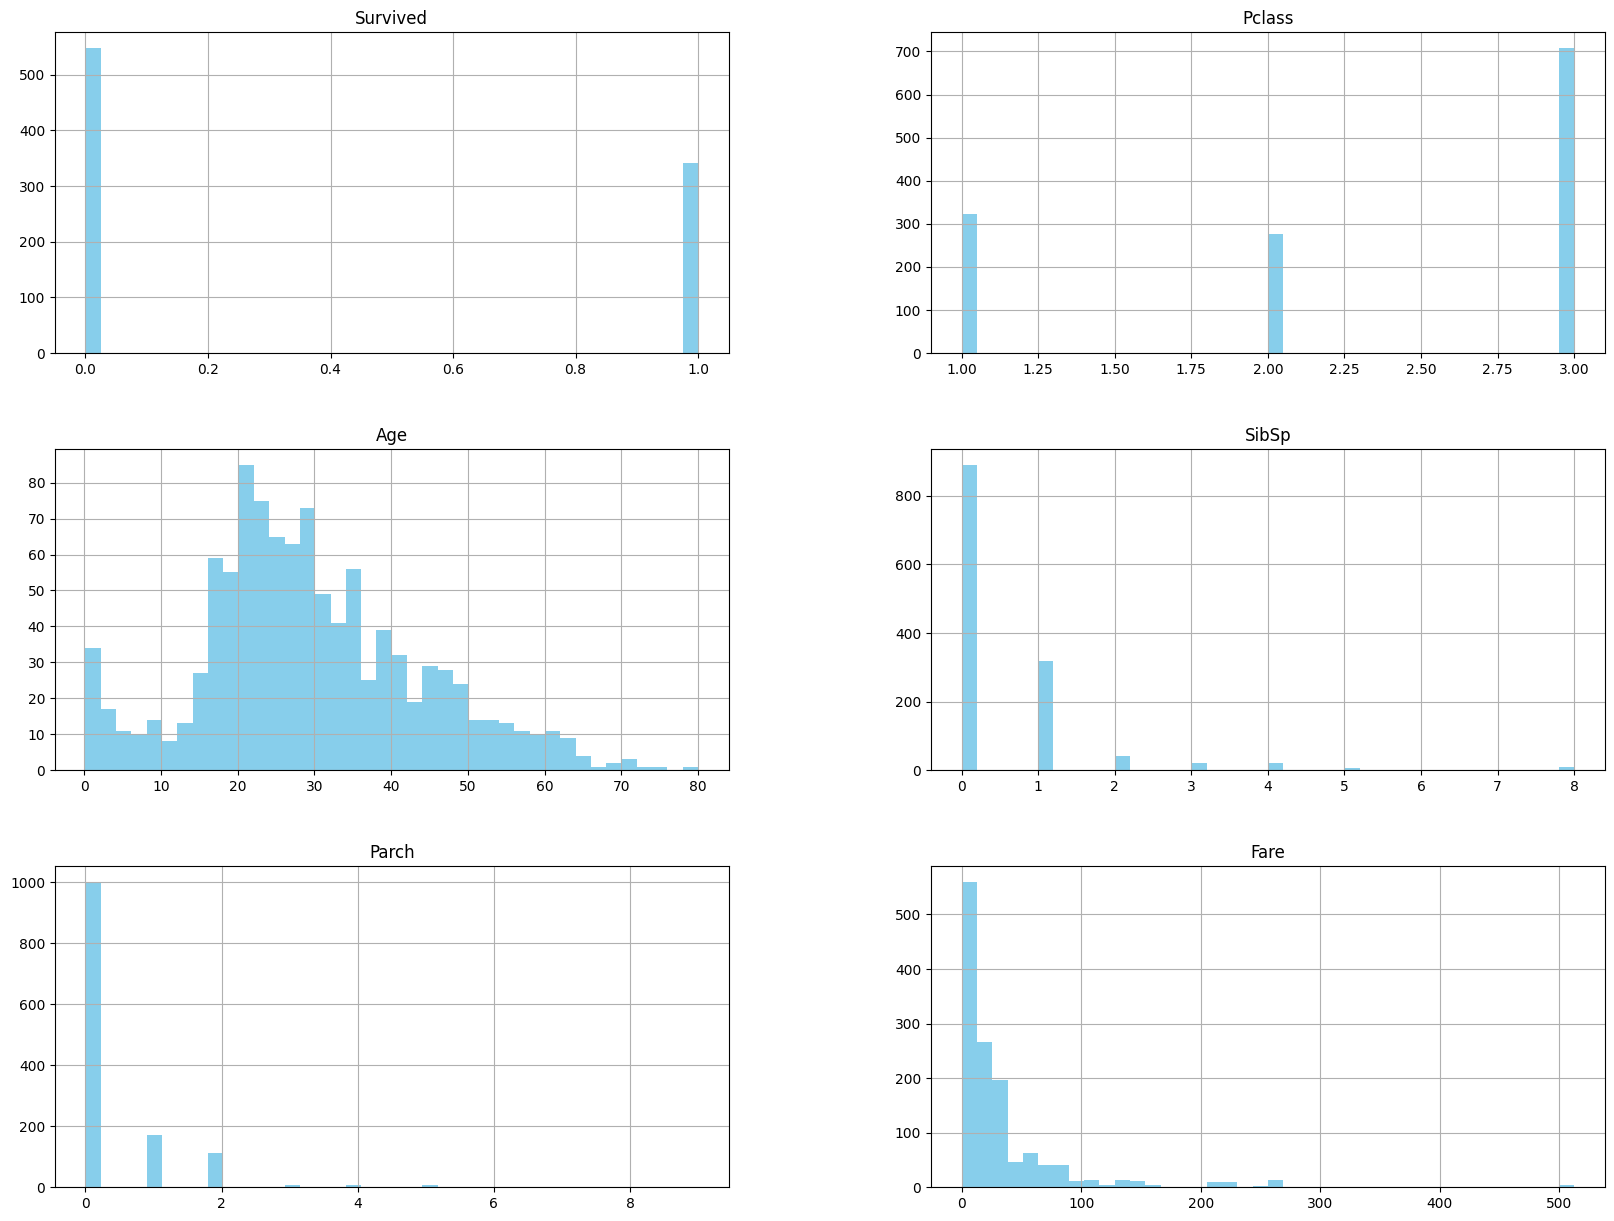

In [289]:
df_list2.hist(bins=40, figsize=(20, 15), color="skyblue")
plt.show()

In [290]:
columns_to_plot = [
    col
    for col in df.columns
    if col not in ["Name", "Sex", "Ticket", "Cabin", "Embarked"]
]

# Crea el diagrama de caja
fig = px.box(df_list2, y=columns_to_plot)

fig.update_layout(title="Boxplot de Todas las Columnas")
fig.show()

In [291]:
df_list2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [292]:
df_list2[["Name", "Sex", "Ticket", "Cabin", "Embarked"]]

,Name,Sex,Ticket,Cabin,Embarked
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
5,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
1305,"Spector, Mr. Woolf",male,A.5. 3236,NaN,S
1306,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1307,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,NaN,S


# LIMPIEZA

#### Eliminar columnas categoricas no esenciales

In [293]:
df_list3 = df_list2.copy()

In [294]:
df_list3 = df_list3.drop(["Name", "Cabin", "Ticket"], axis=1)
df_list3

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0.0,3,male,22.0,1,0,7.2500,S
2,1.0,1,female,38.0,1,0,71.2833,C
3,1.0,3,female,26.0,0,0,7.9250,S
4,1.0,1,female,35.0,1,0,53.1000,S
5,0.0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1305,NaN,3,male,NaN,0,0,8.0500,S
1306,NaN,1,female,39.0,0,0,108.9000,C
1307,NaN,3,male,38.5,0,0,7.2500,S


#### Pasamos datos Categoricos a Numericos

In [295]:
df_list3["Sex"] = df_list3["Sex"].replace({"female": 1, "male": 0})

In [296]:
embarked_unica = df_list3["Embarked"].unique()
numero_embarkes = {embarked: i + 1 for i, embarked in enumerate(embarked_unica)}
df_list3["Embarked"] = df_list3["Embarked"].map(numero_embarkes)

#### Eliminar los nulos

In [297]:
df_list3 = df_list3.dropna(subset=["Survived", "Age"])

In [298]:
df_list3.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [299]:
df_list3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    float64
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
 7   Embarked  714 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 50.2 KB


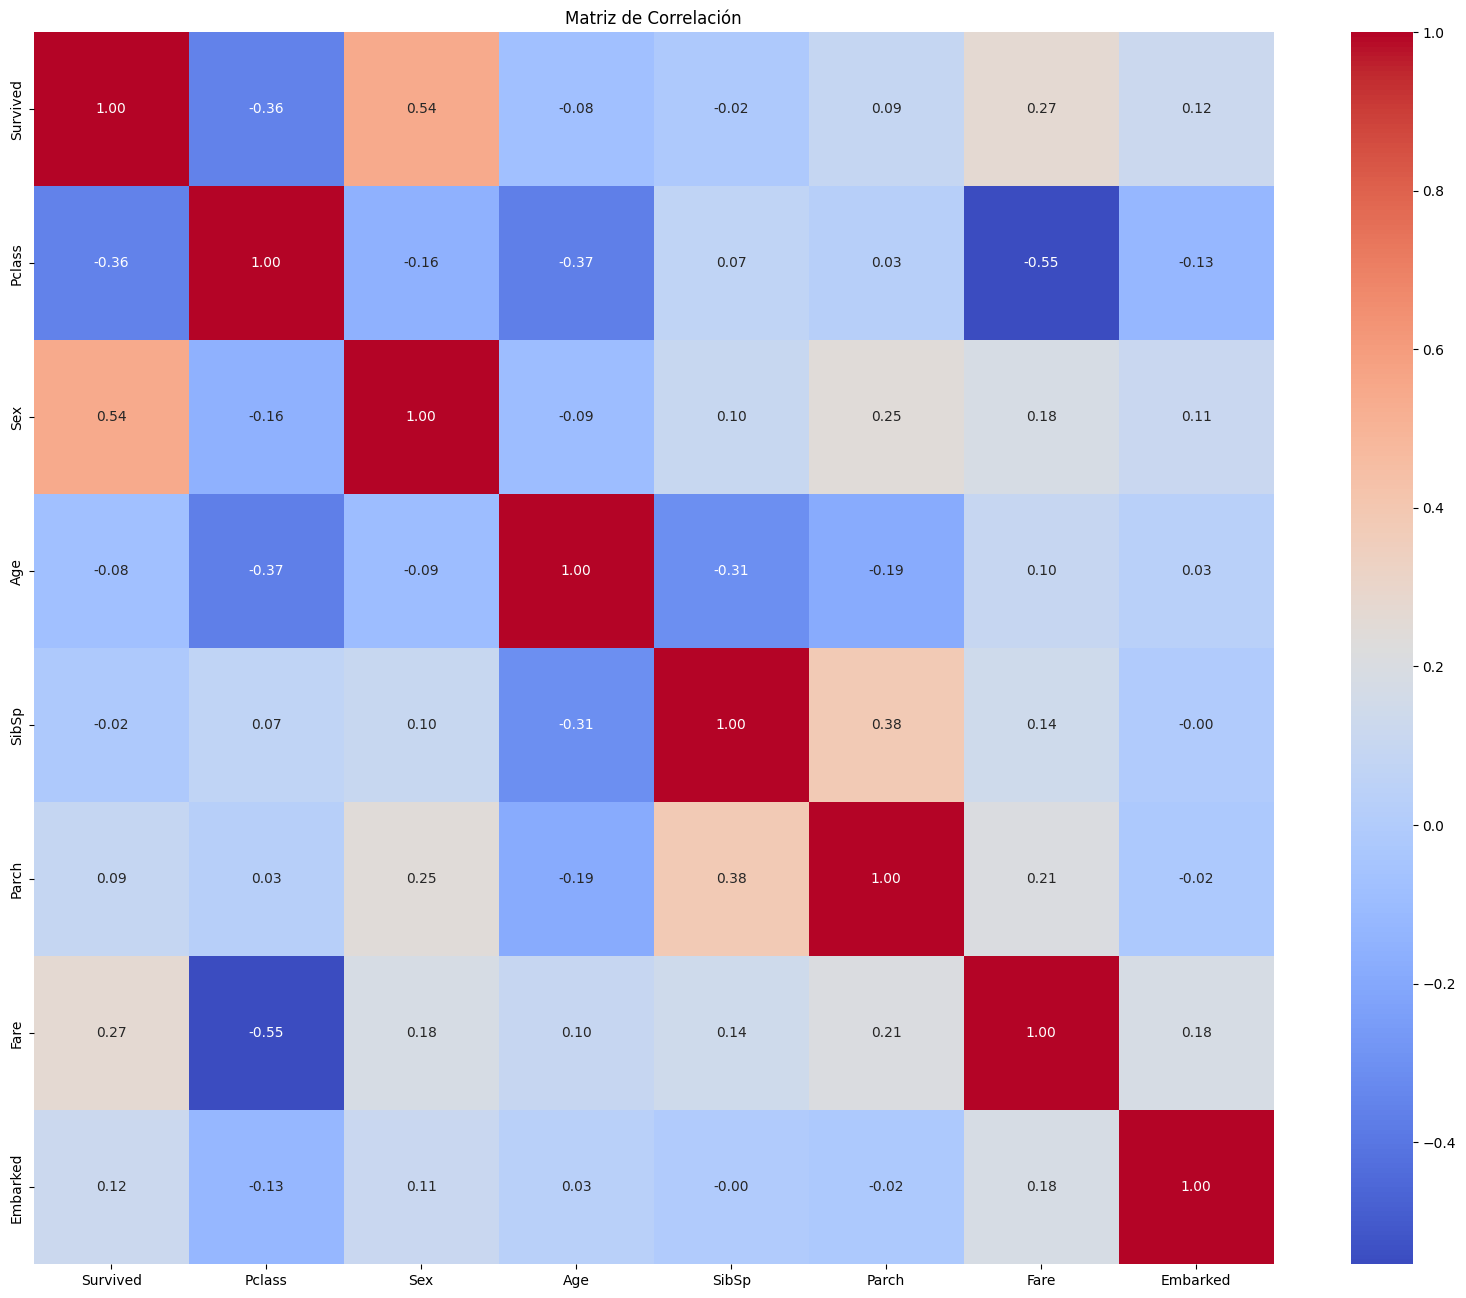

In [300]:
correlation_matrix = df_list3.corr()
# Configura el tamaño de la figura
plt.figure(figsize=(20, 16))
# Personaliza la paleta de colores y agrega anotaciones con dos decimales
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
# Agrega título
plt.title("Matriz de Correlación")
# Muestra el gráfico
plt.show()

In [301]:
df_list4 = df_list3.copy()

In [302]:
df_list4["Survived"].value_counts()

Survived
0.0    424
1.0    290
Name: count, dtype: int64

In [303]:
df_list4.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0.0,3,0,22.0,1,0,7.2500,1
2,1.0,1,1,38.0,1,0,71.2833,2
3,1.0,3,1,26.0,0,0,7.9250,1
4,1.0,1,1,35.0,1,0,53.1000,1
5,0.0,3,0,35.0,0,0,8.0500,1
7,0.0,1,0,54.0,0,0,51.8625,1
8,0.0,3,0,2.0,3,1,21.0750,1
9,1.0,3,1,27.0,0,2,11.1333,1
10,1.0,2,1,14.0,1,0,30.0708,2


# MODELO

In [304]:
from imblearn.under_sampling import NearMiss
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [305]:
X = df_list4.drop(["Survived"], axis=1)
y = df_list4["Survived"]
# code for undersampling
nm = NearMiss()
# Resampling of data of independent variable xand target variable y
data, target = nm.fit_resample(X, y)
print(data.shape)
print(target.shape)
print(data)
print(target)

(580, 7)
(580,)
     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    0  32.0      0      0   7.9250         1
1         3    0  32.0      0      0   7.9250         1
2         3    0  32.0      0      0   7.8958         1
3         3    0  32.0      0      0   8.3625         1
4         3    0  27.0      0      0   7.8958         1
..      ...  ...   ...    ...    ...      ...       ...
575       3    1  15.0      0      0   7.2250         2
576       1    1  56.0      0      1  83.1583         2
577       2    1  25.0      0      1  26.0000         1
578       1    1  19.0      0      0  30.0000         1
579       1    0  26.0      0      0  30.0000         2

[580 rows x 7 columns]
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
575    1.0
576    1.0
577    1.0
578    1.0
579    1.0
Name: Survived, Length: 580, dtype: float64


In [306]:
target.value_counts()

Survived
0.0    290
1.0    290
Name: count, dtype: int64

In [307]:
models = []
models.append(
    ("LogisticReg", LogisticRegression(solver="liblinear", multi_class="ovr"))
)
models.append(("LinearDiscAn", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART DecisionTree", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC(gamma="auto")))
models.append(("randomforest", RandomForestClassifier()))

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [309]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    print(cv_results)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()), "\n")

[0.79130435 0.77192982 0.76315789 0.75438596 0.77192982]
LogisticReg: 0.770542 (0.012251) 

[0.80869565 0.77192982 0.77192982 0.78070175 0.79824561]
LinearDiscAn: 0.786301 (0.014755) 

[0.65217391 0.63157895 0.68421053 0.74561404 0.66666667]
KNN: 0.676049 (0.038837) 

[0.8173913  0.76315789 0.80701754 0.72807018 0.85087719]
CART DecisionTree: 0.793303 (0.043005) 

[0.80869565 0.77192982 0.75438596 0.76315789 0.74561404]
NB: 0.768757 (0.021811) 

[0.66086957 0.65789474 0.6754386  0.68421053 0.74561404]
SVM: 0.684805 (0.031884) 

[0.87826087 0.78947368 0.81578947 0.8245614  0.8245614 ]
randomforest: 0.826529 (0.028887) 



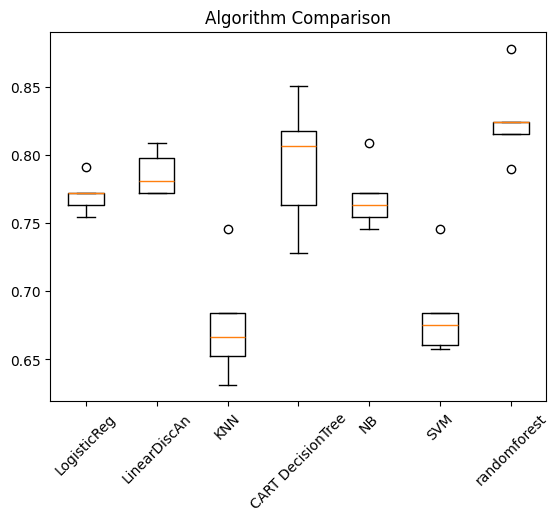

In [310]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title("Algorithm Comparison")
plt.xticks(rotation=45)
plt.show()

In [311]:
predict_list = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name, accuracy_score(y_test, y_pred))
    print("Confusion Matrix", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

LogisticReg 0.8391608391608392
Confusion Matrix [[79 14]
 [ 9 41]]
              precision    recall  f1-score   support

         0.0       0.90      0.85      0.87        93
         1.0       0.75      0.82      0.78        50

    accuracy                           0.84       143
   macro avg       0.82      0.83      0.83       143
weighted avg       0.84      0.84      0.84       143

LinearDiscAn 0.8461538461538461
Confusion Matrix [[80 13]
 [ 9 41]]
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88        93
         1.0       0.76      0.82      0.79        50

    accuracy                           0.85       143
   macro avg       0.83      0.84      0.83       143
weighted avg       0.85      0.85      0.85       143

KNN 0.6923076923076923
Confusion Matrix [[70 23]
 [21 29]]
              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76        93
         1.0       0.56      0.58      0.57

# PICKLE

In [312]:
import pickle  # Importamos la libreria
import warnings

Guardar la lista de modelos en un archivo

In [313]:
with open("modelos.pkl", "wb") as archivo:
    pickle.dump(models, archivo)

Cargar la lista de modelos desde el archivo

In [314]:
with open("modelos.pkl", "rb") as archivo:
    modelos_cargados = pickle.load(archivo)

Buscar el modelo SVM en la lista de modelos

In [315]:
modelo_LinearDiscAn = None
for nombre, modelo in modelos_cargados:
    if nombre == "LinearDiscAn":
        modelo_LinearDiscAn = modelo
        break

Comprobación de una persona aleatoria:

In [316]:
import numpy as np

In [317]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
4,1,1,35.0,1,0,53.1000,1
542,3,1,9.0,4,2,31.2750,1
680,1,0,36.0,0,1,512.3292,2
15,3,1,14.0,0,0,7.8542,1
239,2,0,19.0,0,0,10.5000,1
...,...,...,...,...,...,...,...
677,3,0,24.5,0,0,8.0500,1
735,2,0,23.0,0,0,13.0000,1
625,3,0,21.0,0,0,16.1000,1


In [318]:
datos_de_prueba = [
    (1, 1, 55, 1, 0, 53.1000, 1),
    (3, 0, 15, 4, 2, 31.2750, 1),
]

In [319]:
warnings.filterwarnings("ignore")  # Suprimir advertencias de scikit-learn

In [320]:
predictions = modelo_LinearDiscAn.predict(datos_de_prueba)

for prediction in predictions:
    if prediction == 0:
        print("💔 Muere")
    elif prediction == 1:
        print("💚 Sobreviviría")

💚 Sobreviviría
💔 Muere
